# Data Cleaning part II

After gathering and combining the tweets, it was important to remove null values in order to create a VADER-based sentiment analysis for data exploration.

In [1]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
pd.read_csv('depressive_unigram_tweets_final.csv')

C:\Users\MANASI\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (1,2) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Unnamed: 0,Unnamed: 0.1,id,time,tweet,hashtags,cashtags
0,0,0,1.15135E+18,21:25:13,"Wow, my dad yday: “you don’t take those stupid...",[],[]
1,1,1,1.15135E+18,21:25:07,what part of this was really harmfult of a lot...,[],[]
2,2,2,1.15135E+18,21:25:06,one of the ways I got through my #depression i...,"['#depression', '#uncoveringthenewu', '#change...",[]
3,3,3,1.15135E+18,21:24:55,see i wanna do one of them but they all say th...,[],[]
4,4,4,1.15135E+18,21:24:51,IS IT clinical depression or is it the palpabl...,[],[]
...,...,...,...,...,...,...,...
224268,225172,NaN,1.15237e+18,17:00:17,えっ？！オニィ結構なお歳……（今知った） 変な声でちゃった(笑),[],[]
224269,225173,NaN,1.15237e+18,17:00:12,"#PhysicianFriday ""Let's empower doctors to tak...","['#physicianfriday', '#suicide', '#physicians'...",[]
224270,225174,NaN,1.15237e+18,17:00:01,A spike in suicides among teenage boys in the ...,"['#aztrauma', '#traumatraining', '#suicide', '...",[]
224271,225175,NaN,1.15237e+18,17:00:00,Need some support? Check out the following res...,[],[]


In [3]:
pip install vaderSentiment

Note: you may need to restart the kernel to use updated packages.


In [4]:
import nltk
nltk.download(['punkt','stopwords'])
from nltk.corpus import stopwords
stopwords = stopwords.words('english')

#for sentiment analysis
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\MANASI\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MANASI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
df2 = pd.read_csv('depressive_unigram_tweets_final.csv')

C:\Users\MANASI\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (1,2) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [6]:
df2.head()

,Unnamed: 0,Unnamed: 0.1,id,time,tweet,hashtags,cashtags
0,0,0,1.15135E+18,21:25:13,"Wow, my dad yday: “you don’t take those stupid...",[],[]
1,1,1,1.15135E+18,21:25:07,what part of this was really harmfult of a lot...,[],[]
2,2,2,1.15135E+18,21:25:06,one of the ways I got through my #depression i...,"['#depression', '#uncoveringthenewu', '#change...",[]
3,3,3,1.15135E+18,21:24:55,see i wanna do one of them but they all say th...,[],[]
4,4,4,1.15135E+18,21:24:51,IS IT clinical depression or is it the palpabl...,[],[]


In [7]:
df2.isnull().any().any()  

True

In [8]:
df2.info(null_counts=True) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224273 entries, 0 to 224272
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Unnamed: 0    224273 non-null  int64 
 1   Unnamed: 0.1  135497 non-null  object
 2   id            224263 non-null  object
 3   time          224263 non-null  object
 4   tweet         224250 non-null  object
 5   hashtags      224237 non-null  object
 6   cashtags      224237 non-null  object
dtypes: int64(1), object(6)
memory usage: 12.0+ MB


In [9]:
#Extracting the records having not null values
df_new = df2[df2['tweet'].notnull()]

In [10]:
df_new.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 224250 entries, 0 to 224272
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Unnamed: 0    224250 non-null  int64 
 1   Unnamed: 0.1  135474 non-null  object
 2   id            224250 non-null  object
 3   time          224250 non-null  object
 4   tweet         224250 non-null  object
 5   hashtags      224237 non-null  object
 6   cashtags      224237 non-null  object
dtypes: int64(1), object(6)
memory usage: 13.7+ MB


In [11]:
#df_new.isnull().any().any() 

True

In [12]:
# Removing stopwords
df_new['clean_tweet'] = df_new['tweet'].apply(lambda x: ' '.join([item for item in x.split() if item not in stopwords])) 

<ipython-input-12-c4fa714326d9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['clean_tweet'] = df_new['tweet'].apply(lambda x: ' '.join([item for item in x.split() if item not in stopwords]))


In [13]:
df_new.head()

,Unnamed: 0,Unnamed: 0.1,id,time,tweet,hashtags,cashtags,clean_tweet
0,0,0,1.15135E+18,21:25:13,"Wow, my dad yday: “you don’t take those stupid...",[],[],"Wow, dad yday: “you don’t take stupid depressi..."
1,1,1,1.15135E+18,21:25:07,what part of this was really harmfult of a lot...,[],[],part really harmfult lot people went every gui...
2,2,2,1.15135E+18,21:25:06,one of the ways I got through my #depression i...,"['#depression', '#uncoveringthenewu', '#change...",[],one ways I got #depression learning dance rain...
3,3,3,1.15135E+18,21:24:55,see i wanna do one of them but they all say th...,[],[],"see wanna one say PTSD, depression, and/or anx..."
4,4,4,1.15135E+18,21:24:51,IS IT clinical depression or is it the palpabl...,[],[],IS IT clinical depression palpable hopelessnes...


In [14]:
#  The compound component is taken into consideration and used for further analysis in our model. 
# A vader_score is given to each record which depends on the polarity of the compound 
#-1 means (most extreme negative) and +1 means(most extreme positive). 

df_new['vader_score'] = df_new['clean_tweet'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

<ipython-input-14-467c7b3b47b3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['vader_score'] = df_new['clean_tweet'].apply(lambda x: analyzer.polarity_scores(x)['compound'])


In [15]:
df_new.head()

,Unnamed: 0,Unnamed: 0.1,id,time,tweet,hashtags,cashtags,clean_tweet,vader_score
0,0,0,1.15135E+18,21:25:13,"Wow, my dad yday: “you don’t take those stupid...",[],[],"Wow, dad yday: “you don’t take stupid depressi...",-0.4122
1,1,1,1.15135E+18,21:25:07,what part of this was really harmfult of a lot...,[],[],part really harmfult lot people went every gui...,-0.8074
2,2,2,1.15135E+18,21:25:06,one of the ways I got through my #depression i...,"['#depression', '#uncoveringthenewu', '#change...",[],one ways I got #depression learning dance rain...,0.3382
3,3,3,1.15135E+18,21:24:55,see i wanna do one of them but they all say th...,[],[],"see wanna one say PTSD, depression, and/or anx...",-0.4588
4,4,4,1.15135E+18,21:24:51,IS IT clinical depression or is it the palpabl...,[],[],IS IT clinical depression palpable hopelessnes...,-0.8316


In [16]:
positive_num = len(df_new[df_new['vader_score'] >=0.05])
#neutral_num = len(df_new[(df_new['vaderReviewScore'] >-0.05) & (df_new['vaderReviewScore']<0.05)])
negative_num = len(df_new[df_new['vader_score']<0.05])

In [17]:
#positive_num,neutral_num, negative_num
positive_num, negative_num

(49444, 174806)

In [18]:
# Later, each record is again binary label 0 for negative tweets and 1 for positive tweets according to the vader_score.

df_new['vader_sentiment_label']= df_new['vader_score'].map(lambda x:int(1) if x>=0.05 else int(0))

<ipython-input-18-b8ea3caf83dc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['vader_sentiment_label']= df_new['vader_score'].map(lambda x:int(1) if x>=0.05 else int(0))


In [19]:
df_new.head()

,Unnamed: 0,Unnamed: 0.1,id,time,tweet,hashtags,cashtags,clean_tweet,vader_score,vader_sentiment_label
0,0,0,1.15135E+18,21:25:13,"Wow, my dad yday: “you don’t take those stupid...",[],[],"Wow, dad yday: “you don’t take stupid depressi...",-0.4122,0
1,1,1,1.15135E+18,21:25:07,what part of this was really harmfult of a lot...,[],[],part really harmfult lot people went every gui...,-0.8074,0
2,2,2,1.15135E+18,21:25:06,one of the ways I got through my #depression i...,"['#depression', '#uncoveringthenewu', '#change...",[],one ways I got #depression learning dance rain...,0.3382,1
3,3,3,1.15135E+18,21:24:55,see i wanna do one of them but they all say th...,[],[],"see wanna one say PTSD, depression, and/or anx...",-0.4588,0
4,4,4,1.15135E+18,21:24:51,IS IT clinical depression or is it the palpabl...,[],[],IS IT clinical depression palpable hopelessnes...,-0.8316,0


In [20]:
#df_new.loc[df_new['vaderReviewScore'] >=0.00,"vaderSentimentLabel"] = 1
#df_new.loc[df_new['vaderReviewScore']<=-0.00,"vaderSentimentLabel"] = 0

In [21]:
df_new.head()

,Unnamed: 0,Unnamed: 0.1,id,time,tweet,hashtags,cashtags,clean_tweet,vader_score,vader_sentiment_label
0,0,0,1.15135E+18,21:25:13,"Wow, my dad yday: “you don’t take those stupid...",[],[],"Wow, dad yday: “you don’t take stupid depressi...",-0.4122,0
1,1,1,1.15135E+18,21:25:07,what part of this was really harmfult of a lot...,[],[],part really harmfult lot people went every gui...,-0.8074,0
2,2,2,1.15135E+18,21:25:06,one of the ways I got through my #depression i...,"['#depression', '#uncoveringthenewu', '#change...",[],one ways I got #depression learning dance rain...,0.3382,1
3,3,3,1.15135E+18,21:24:55,see i wanna do one of them but they all say th...,[],[],"see wanna one say PTSD, depression, and/or anx...",-0.4588,0
4,4,4,1.15135E+18,21:24:51,IS IT clinical depression or is it the palpabl...,[],[],IS IT clinical depression palpable hopelessnes...,-0.8316,0


In [22]:
#Drop useless columns
df_new.drop(['Unnamed: 0.1', 'id', 'time', 'tweet', ], axis = 1, inplace = True)

C:\Users\MANASI\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [23]:
df_new = df_new[['Unnamed: 0', 'vader_sentiment_label', 'vader_score', 'clean_tweet']]

In [24]:
df_new.head()

,Unnamed: 0,vader_sentiment_label,vader_score,clean_tweet
0,0,0,-0.4122,"Wow, dad yday: “you don’t take stupid depressi..."
1,1,0,-0.8074,part really harmfult lot people went every gui...
2,2,1,0.3382,one ways I got #depression learning dance rain...
3,3,0,-0.4588,"see wanna one say PTSD, depression, and/or anx..."
4,4,0,-0.8316,IS IT clinical depression palpable hopelessnes...


In [25]:
# positive_num = len(df_new[df_new['vader_score'] >=0.05])
# neutral_num = len(df_new[(df_new['vader_score'] >-0.05) & (df_new['vader_score']<0.05)])
# negative_num = len(df_new[df_new['vader_score']<=-0.05])

In [26]:
# positive_num,neutral_num, negative_num

(49444, 58857, 115949)

In [28]:
df_new['clean_tweet']

0         Wow, dad yday: “you don’t take stupid depressi...
1         part really harmfult lot people went every gui...
2         one ways I got #depression learning dance rain...
3         see wanna one say PTSD, depression, and/or anx...
4         IS IT clinical depression palpable hopelessnes...
                                ...                        
224268                     えっ？！オニィ結構なお歳……（今知った） 変な声でちゃった(笑)
224269    #PhysicianFriday "Let's empower doctors take t...
224270    A spike suicides among teenage boys United Sta...
224271    Need support? Check following resources: Couns...
224272    You improve quality life friend need. Learn Me...
Name: clean_tweet, Length: 224250, dtype: object

In [28]:
df_new.to_csv('vader_processed_final.csv')

In [ ]:
 # Data Exploration

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections

import nltk
from nltk.corpus import stopwords
import re
from nltk import bigrams
import networkx as nx
from statistics import *

import warnings
warnings.filterwarnings("ignore")

sns.set(font_scale=1.5)
sns.set_style("whitegrid")

In [30]:
df_new['text'] = df_new['clean_tweet']

In [31]:
df_new['text']

0         Wow, dad yday: “you don’t take stupid depressi...
1         part really harmfult lot people went every gui...
2         one ways I got #depression learning dance rain...
3         see wanna one say PTSD, depression, and/or anx...
4         IS IT clinical depression palpable hopelessnes...
                                ...                        
224268                     えっ？！オニィ結構なお歳……（今知った） 変な声でちゃった(笑)
224269    #PhysicianFriday "Let's empower doctors take t...
224270    A spike suicides among teenage boys United Sta...
224271    Need support? Check following resources: Couns...
224272    You improve quality life friend need. Learn Me...
Name: text, Length: 224250, dtype: object

In [32]:
# Removing URL using Regex
def remove_url(txt):
    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

In [33]:
all_tweets_no_urls = [remove_url(tweet) for tweet in df_new['text']]
all_tweets_no_urls[:5]

['Wow dad yday you dont take stupid depression drugs anymore though you Because theyre absolute worst thing and never need them Aint great family supportive My moms sisters stance similar btw',
 'part really harmfult lot people went every guideline understand 13rw horror show supposed insight depression mental illness overall helpful public narrative topic',
 'one ways I got depression learning dance rain It source strength stronger circumstances UncoveringthenewU ChangeYourMindChangeYourCircumstances pictwittercom3vxKuQ0DvD',
 'see wanna one say PTSD depression andor anxiety play LIKEE',
 'IS IT clinical depression palpable hopelessness generation']

In [34]:
#lower_case
sentences = df_new['text']

In [35]:
all_tweets_no_urls[0].split()

['Wow',
 'dad',
 'yday',
 'you',
 'dont',
 'take',
 'stupid',
 'depression',
 'drugs',
 'anymore',
 'though',
 'you',
 'Because',
 'theyre',
 'absolute',
 'worst',
 'thing',
 'and',
 'never',
 'need',
 'them',
 'Aint',
 'great',
 'family',
 'supportive',
 'My',
 'moms',
 'sisters',
 'stance',
 'similar',
 'btw']

In [36]:
all_tweets_no_urls[0].lower().split()

['wow',
 'dad',
 'yday',
 'you',
 'dont',
 'take',
 'stupid',
 'depression',
 'drugs',
 'anymore',
 'though',
 'you',
 'because',
 'theyre',
 'absolute',
 'worst',
 'thing',
 'and',
 'never',
 'need',
 'them',
 'aint',
 'great',
 'family',
 'supportive',
 'my',
 'moms',
 'sisters',
 'stance',
 'similar',
 'btw']

In [37]:
words_in_tweet = [tweet.lower().split() for tweet in all_tweets_no_urls]
words_in_tweet[:2]

[['wow',
  'dad',
  'yday',
  'you',
  'dont',
  'take',
  'stupid',
  'depression',
  'drugs',
  'anymore',
  'though',
  'you',
  'because',
  'theyre',
  'absolute',
  'worst',
  'thing',
  'and',
  'never',
  'need',
  'them',
  'aint',
  'great',
  'family',
  'supportive',
  'my',
  'moms',
  'sisters',
  'stance',
  'similar',
  'btw'],
 ['part',
  'really',
  'harmfult',
  'lot',
  'people',
  'went',
  'every',
  'guideline',
  'understand',
  '13rw',
  'horror',
  'show',
  'supposed',
  'insight',
  'depression',
  'mental',
  'illness',
  'overall',
  'helpful',
  'public',
  'narrative',
  'topic']]

In [38]:
# List of all words across tweets
all_words_no_urls = list(itertools.chain(*words_in_tweet))

# Create counter
counts_no_urls = collections.Counter(all_words_no_urls)

counts_no_urls.most_common(15)

[('i', 65848),
 ('lonely', 55378),
 ('suicide', 39566),
 ('im', 29153),
 ('depression', 26013),
 ('like', 14866),
 ('depressed', 14064),
 ('people', 11913),
 ('hopeless', 11237),
 ('the', 10641),
 ('you', 10512),
 ('feel', 10500),
 ('its', 9617),
 ('get', 8998),
 ('one', 8971)]

In [39]:
clean_tweets_no_urls = pd.DataFrame(counts_no_urls.most_common(15),
                             columns=['words', 'count'])

clean_tweets_no_urls.head()

,words,count
0,i,65848
1,lonely,55378
2,suicide,39566
3,im,29153
4,depression,26013


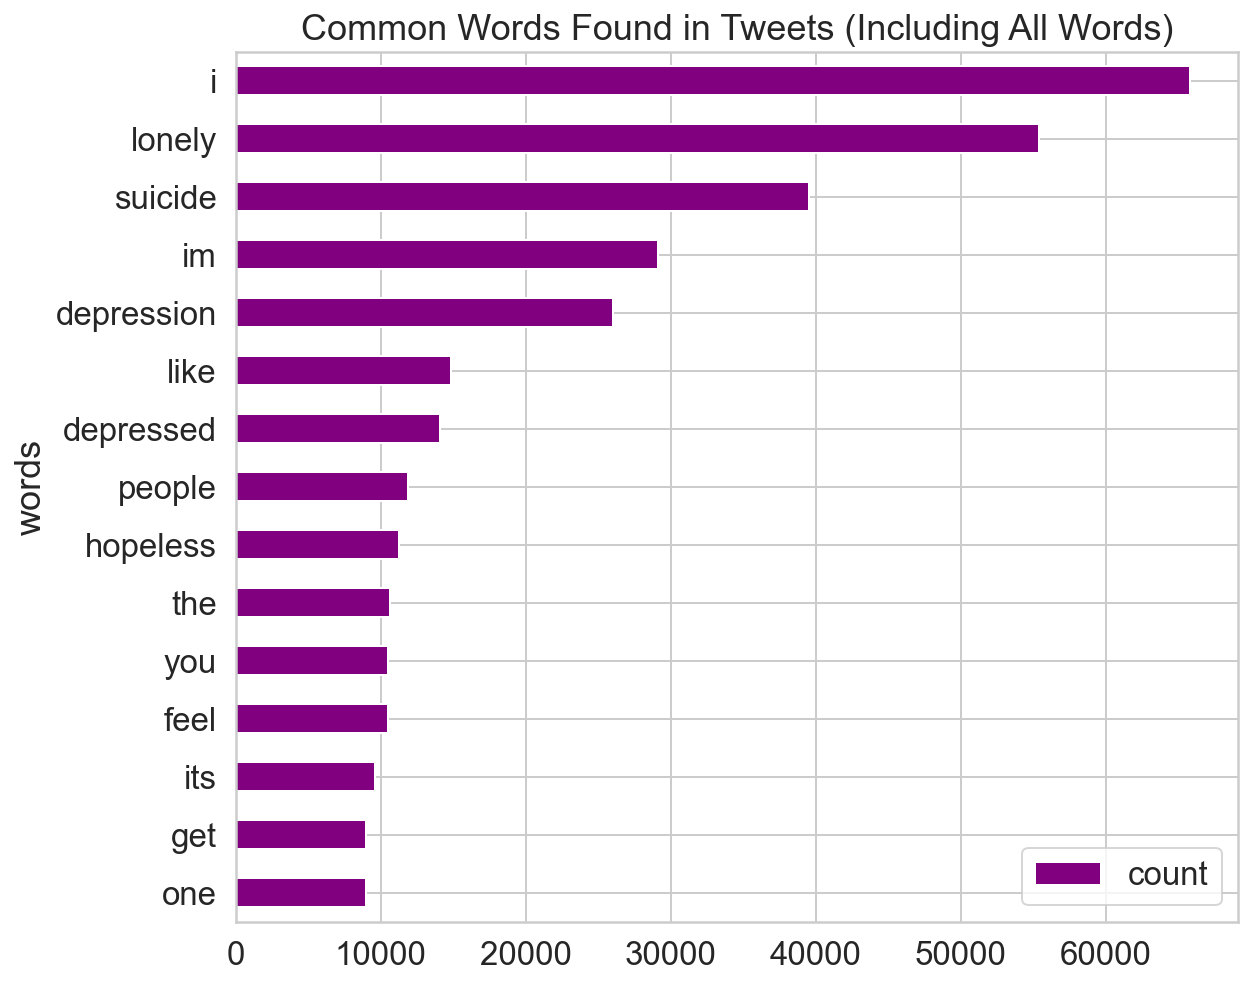

In [40]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_tweets_no_urls.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in Tweets (Including All Words)")

plt.show()


In [41]:
stop_words = set(stopwords.words('english'))

# View a few words from the set
list(stop_words)[0:10]

['no',
 "it's",
 'were',
 'being',
 "needn't",
 'y',
 'his',
 'needn',
 "wouldn't",
 "isn't"]

In [42]:
words_in_tweet[0]


['wow',
 'dad',
 'yday',
 'you',
 'dont',
 'take',
 'stupid',
 'depression',
 'drugs',
 'anymore',
 'though',
 'you',
 'because',
 'theyre',
 'absolute',
 'worst',
 'thing',
 'and',
 'never',
 'need',
 'them',
 'aint',
 'great',
 'family',
 'supportive',
 'my',
 'moms',
 'sisters',
 'stance',
 'similar',
 'btw']

In [43]:
# Remove stop words from each tweet list of words
tweets_nsw = [[word for word in tweet_words if not word in stop_words]
              for tweet_words in words_in_tweet]

tweets_nsw[0]

['wow',
 'dad',
 'yday',
 'dont',
 'take',
 'stupid',
 'depression',
 'drugs',
 'anymore',
 'though',
 'theyre',
 'absolute',
 'worst',
 'thing',
 'never',
 'need',
 'aint',
 'great',
 'family',
 'supportive',
 'moms',
 'sisters',
 'stance',
 'similar',
 'btw']

In [44]:
all_words_nsw = list(itertools.chain(*tweets_nsw))

counts_nsw = collections.Counter(all_words_nsw)

counts_nsw.most_common(15)

[('lonely', 55378),
 ('suicide', 39566),
 ('im', 29153),
 ('depression', 26013),
 ('like', 14866),
 ('depressed', 14064),
 ('people', 11913),
 ('hopeless', 11237),
 ('feel', 10500),
 ('get', 8998),
 ('one', 8971),
 ('de', 8204),
 ('know', 8041),
 ('dont', 7855),
 ('time', 7433)]

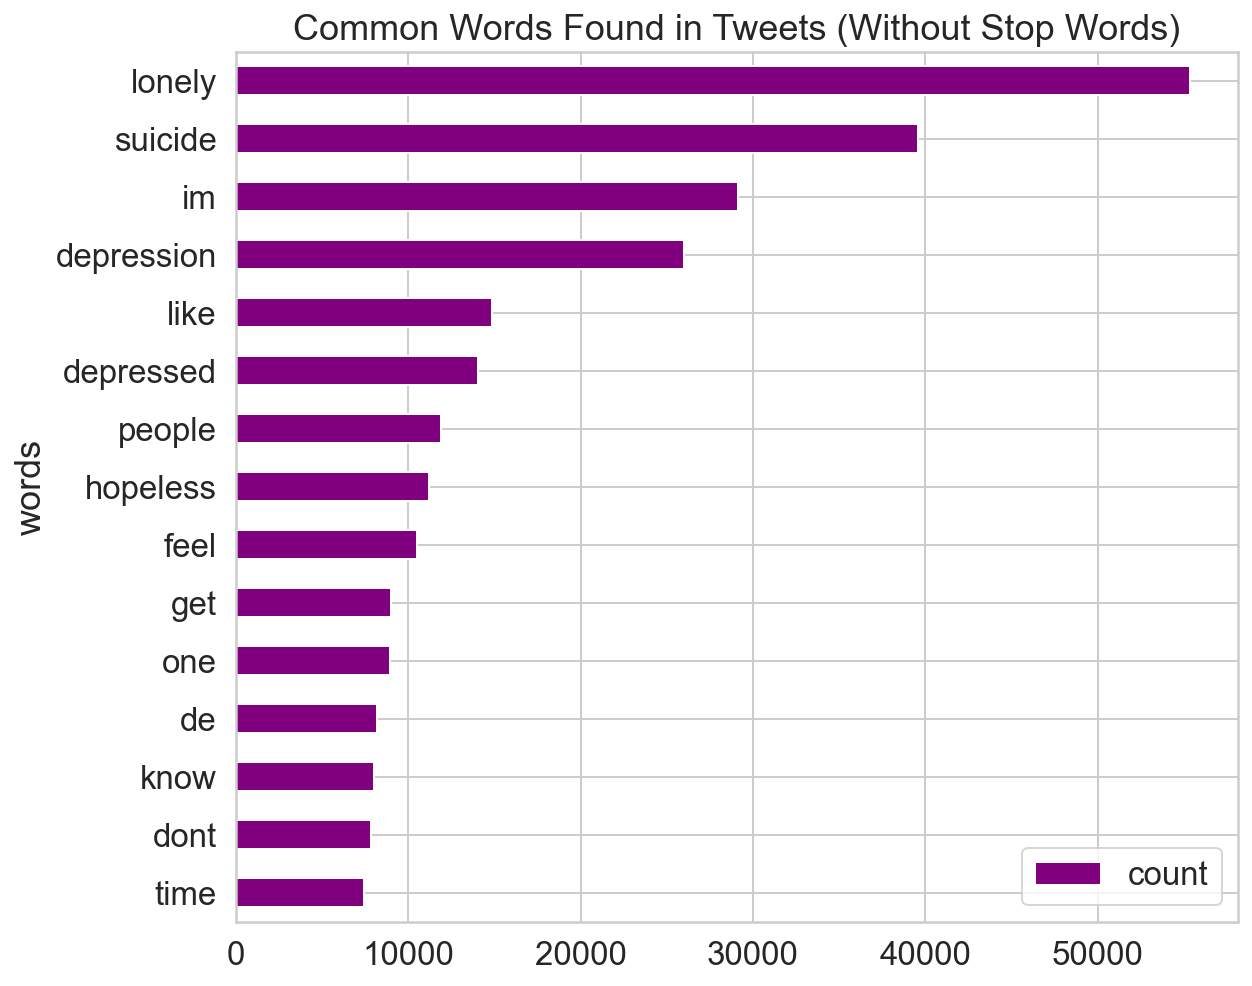

In [45]:
clean_tweets_nsw = pd.DataFrame(counts_nsw.most_common(15),
                             columns=['words', 'count'])

fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_tweets_nsw.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in Tweets (Without Stop Words)")

plt.show()

In [46]:
collection_words = ['im', 'de', 'like', 'one']
tweets_nsw_nc = [[w for w in word if not w in collection_words]
                 for word in tweets_nsw]

In [47]:
tweets_nsw[0]


['wow',
 'dad',
 'yday',
 'dont',
 'take',
 'stupid',
 'depression',
 'drugs',
 'anymore',
 'though',
 'theyre',
 'absolute',
 'worst',
 'thing',
 'never',
 'need',
 'aint',
 'great',
 'family',
 'supportive',
 'moms',
 'sisters',
 'stance',
 'similar',
 'btw']

In [48]:
tweets_nsw_nc[0]


['wow',
 'dad',
 'yday',
 'dont',
 'take',
 'stupid',
 'depression',
 'drugs',
 'anymore',
 'though',
 'theyre',
 'absolute',
 'worst',
 'thing',
 'never',
 'need',
 'aint',
 'great',
 'family',
 'supportive',
 'moms',
 'sisters',
 'stance',
 'similar',
 'btw']

In [49]:
# Flatten list of words in clean tweets
all_words_nsw_nc = list(itertools.chain(*tweets_nsw_nc))

# Create counter of words in clean tweets
counts_nsw_nc = collections.Counter(all_words_nsw_nc)

counts_nsw_nc.most_common(15)

[('lonely', 55378),
 ('suicide', 39566),
 ('depression', 26013),
 ('depressed', 14064),
 ('people', 11913),
 ('hopeless', 11237),
 ('feel', 10500),
 ('get', 8998),
 ('know', 8041),
 ('dont', 7855),
 ('time', 7433),
 ('life', 6812),
 ('love', 6585),
 ('que', 6421),
 ('really', 6298)]

In [50]:
len(counts_nsw_nc)


125589

In [57]:
#import statistics
#mean(counts_nsw_nc)

In [58]:
clean_tweets_ncw = pd.DataFrame(counts_nsw_nc.most_common(15),
                             columns=['words', 'count'])
clean_tweets_ncw.head()

,words,count
0,lonely,55378
1,suicide,39566
2,depression,26013
3,depressed,14064
4,people,11913


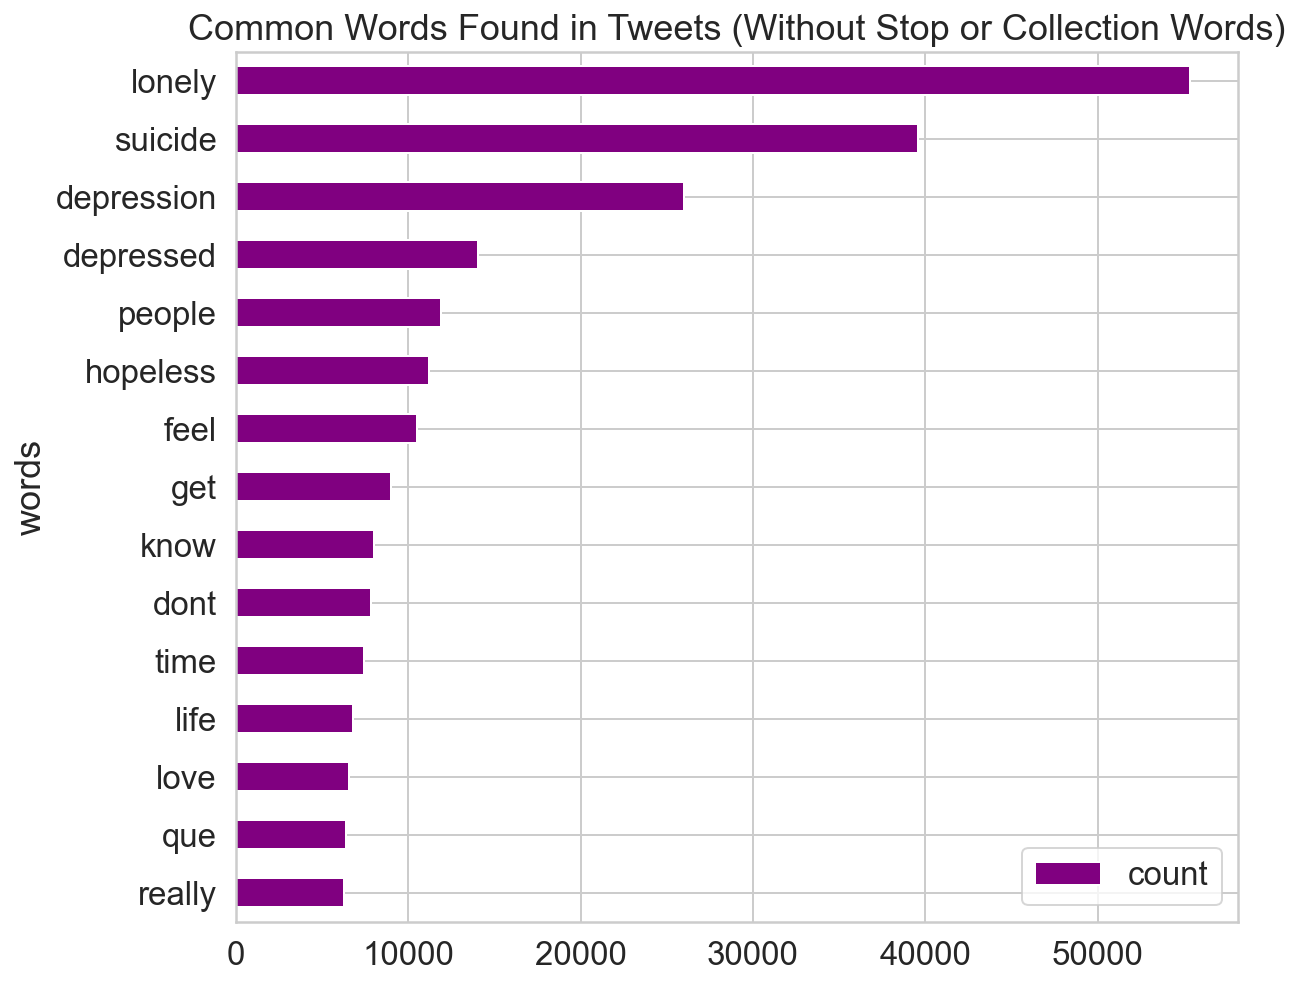

In [59]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_tweets_ncw.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in Tweets (Without Stop or Collection Words)")

plt.show()

In [61]:
from nltk import bigrams

# Create list of lists containing bigrams in tweets
terms_bigram = [list(bigrams(tweet)) for tweet in tweets_nsw_nc]

# View bigrams for the first tweet
terms_bigram[0]

[('wow', 'dad'),
 ('dad', 'yday'),
 ('yday', 'dont'),
 ('dont', 'take'),
 ('take', 'stupid'),
 ('stupid', 'depression'),
 ('depression', 'drugs'),
 ('drugs', 'anymore'),
 ('anymore', 'though'),
 ('though', 'theyre'),
 ('theyre', 'absolute'),
 ('absolute', 'worst'),
 ('worst', 'thing'),
 ('thing', 'never'),
 ('never', 'need'),
 ('need', 'aint'),
 ('aint', 'great'),
 ('great', 'family'),
 ('family', 'supportive'),
 ('supportive', 'moms'),
 ('moms', 'sisters'),
 ('sisters', 'stance'),
 ('stance', 'similar'),
 ('similar', 'btw')]

In [62]:
# Flatten list of bigrams in clean tweets
bigrams = list(itertools.chain(*terms_bigram))

# Create counter of words in clean bigrams
bigram_counts = collections.Counter(bigrams)

bigram_counts.most_common(20)

[(('afraid', 'loneliness'), 4641),
 (('feel', 'lonely'), 3541),
 (('suicide', 'squad'), 2769),
 (('commit', 'suicide'), 2624),
 (('committed', 'suicide'), 1685),
 (('feeling', 'lonely'), 1645),
 (('mental', 'health'), 1398),
 (('hopeless', 'romantic'), 1347),
 (('anxiety', 'depression'), 1337),
 (('suicide', 'bomber'), 1320),
 (('depression', 'anxiety'), 1278),
 (('sad', 'lonely'), 1181),
 (('social', 'media'), 958),
 (('get', 'lonely'), 922),
 (('suicide', 'prevention'), 841),
 (('committing', 'suicide'), 838),
 (('seasonal', 'depression'), 806),
 (('female', 'suicide'), 760),
 (('dont', 'know'), 741),
 (('lonely', 'night'), 714)]

In [63]:
bigram_df = pd.DataFrame(bigram_counts.most_common(20),
                             columns=['bigram', 'count'])

bigram_df

,bigram,count
0,"(afraid, loneliness)",4641
1,"(feel, lonely)",3541
2,"(suicide, squad)",2769
3,"(commit, suicide)",2624
4,"(committed, suicide)",1685
5,"(feeling, lonely)",1645
6,"(mental, health)",1398
7,"(hopeless, romantic)",1347
8,"(anxiety, depression)",1337
9,"(suicide, bomber)",1320


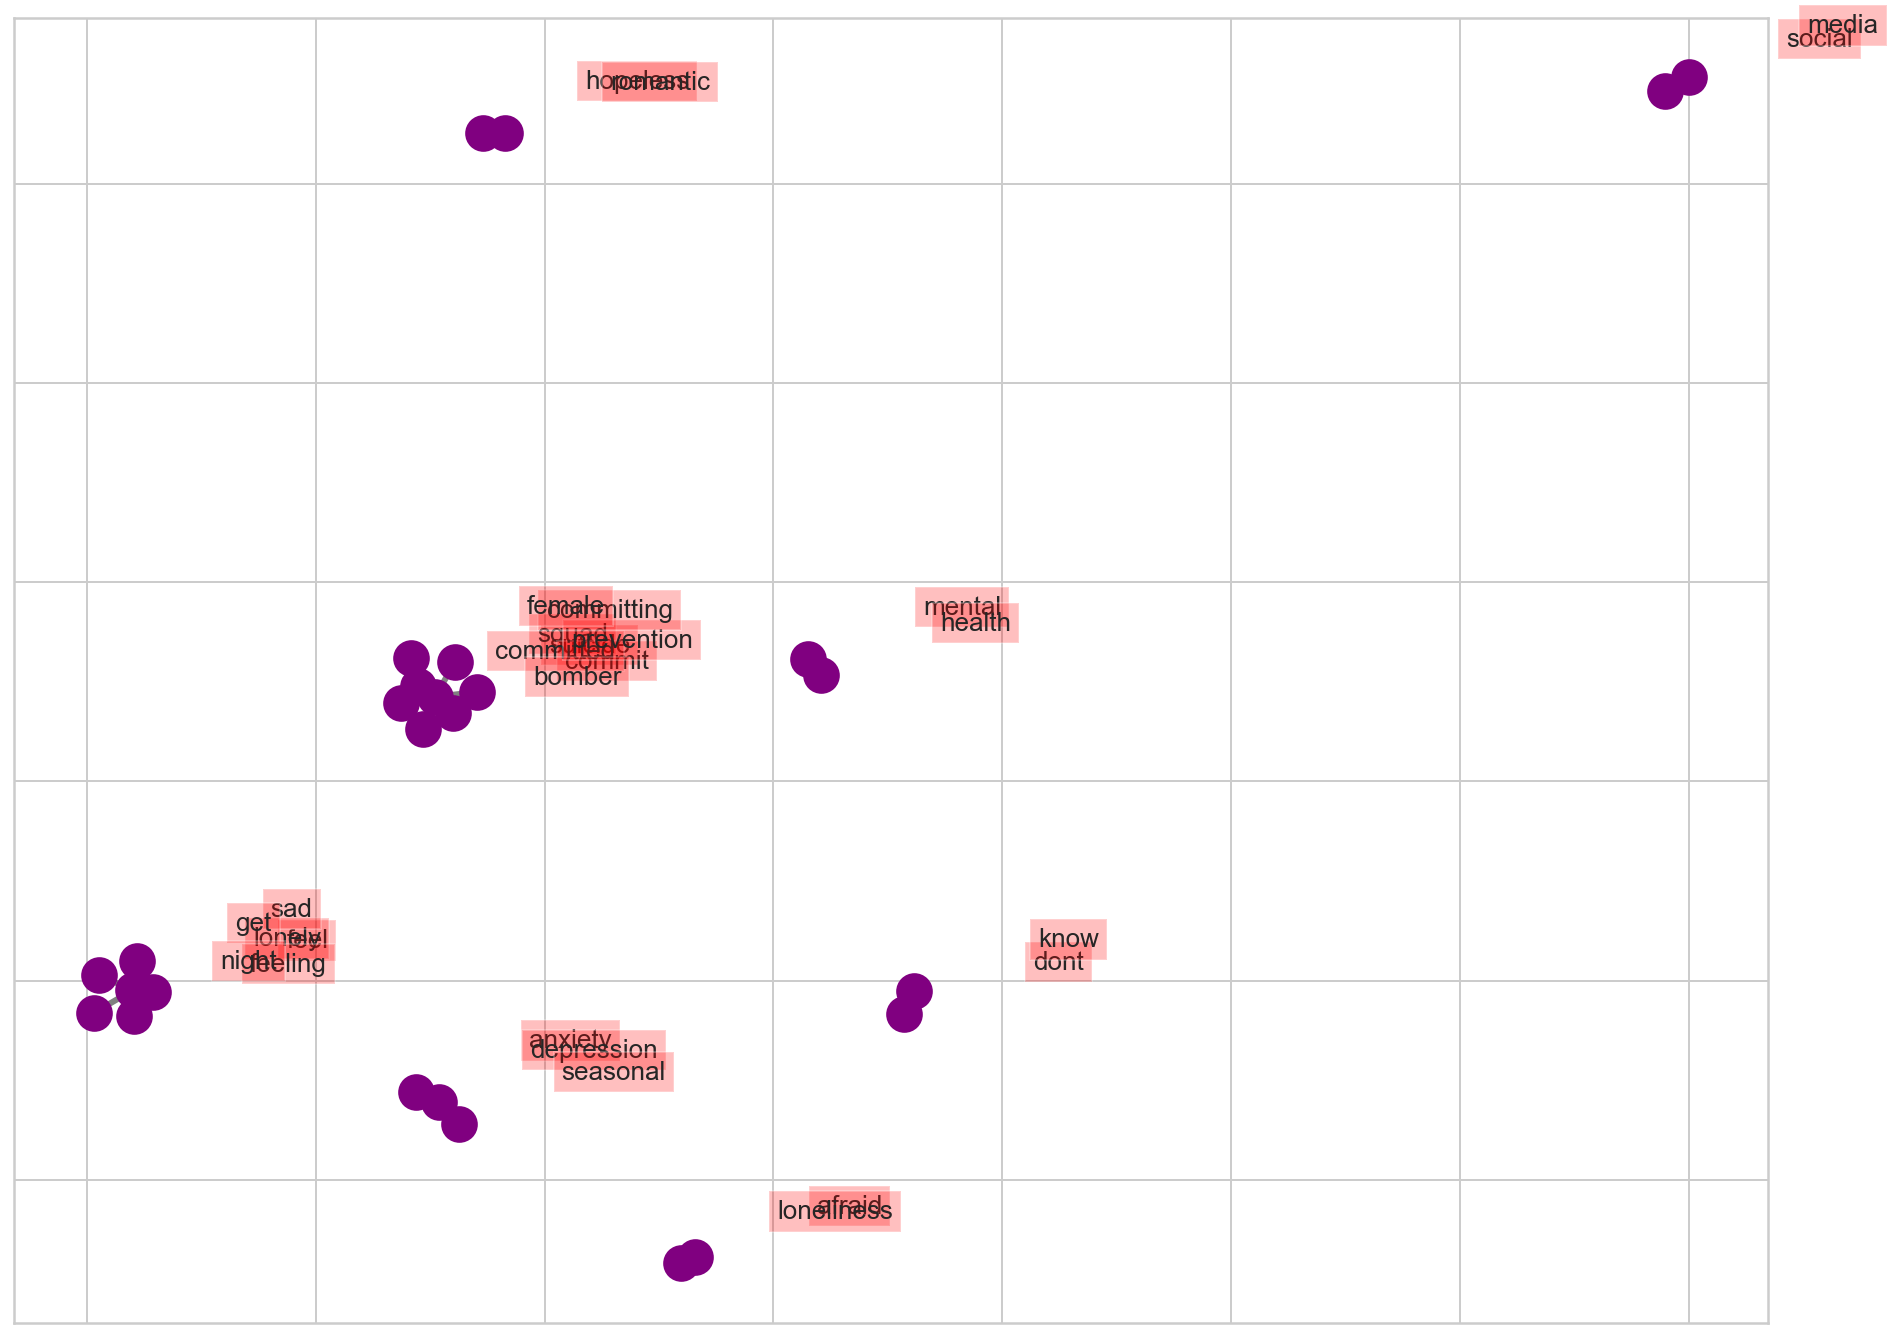

In [64]:
# Create dictionary of bigrams and their counts
d = bigram_df.set_index('bigram').T.to_dict('records')
# Create network plot 
G = nx.Graph()

# Create connections between nodes
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v * 10))

fig, ax = plt.subplots(figsize=(14, 12))

pos = nx.spring_layout(G, k=1)

# Plot networks
nx.draw_networkx(G, pos,
                 font_size=16,
                 width=3,
                 edge_color='grey',
                 node_color='purple',
                 with_labels = False,
                 ax=ax)

# Create offset labels
for key, value in pos.items():
    x, y = value[0]+.135, value[1]+.045
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='red', alpha=0.25),
            horizontalalignment='center', fontsize=13)
    
plt.show()

In [65]:
train = pd.read_csv('depressive_unigram_tweets_final.csv')

In [66]:
train.head()

,Unnamed: 0,Unnamed: 0.1,id,time,tweet,hashtags,cashtags
0,0,0,1.15135E+18,21:25:13,"Wow, my dad yday: “you don’t take those stupid...",[],[]
1,1,1,1.15135E+18,21:25:07,what part of this was really harmfult of a lot...,[],[]
2,2,2,1.15135E+18,21:25:06,one of the ways I got through my #depression i...,"['#depression', '#uncoveringthenewu', '#change...",[]
3,3,3,1.15135E+18,21:24:55,see i wanna do one of them but they all say th...,[],[]
4,4,4,1.15135E+18,21:24:51,IS IT clinical depression or is it the palpabl...,[],[]


In [67]:
train['word_count'] = train['tweet'].apply(lambda x: int(len(str(x).split(" "))))
train[['tweet','word_count']].head()

,tweet,word_count
0,"Wow, my dad yday: “you don’t take those stupid...",50
1,what part of this was really harmfult of a lot...,51
2,one of the ways I got through my #depression i...,33
3,see i wanna do one of them but they all say th...,24
4,IS IT clinical depression or is it the palpabl...,13


In [68]:
train['char_count'] = train['tweet'].str.len() ## this also includes spaces
train[['tweet','char_count']].head()

,tweet,char_count
0,"Wow, my dad yday: “you don’t take those stupid...",278.0
1,what part of this was really harmfult of a lot...,274.0
2,one of the ways I got through my #depression i...,235.0
3,see i wanna do one of them but they all say th...,114.0
4,IS IT clinical depression or is it the palpabl...,78.0


In [69]:
char_count = train['tweet'].str.len() ## this also includes spaces
char_count.head()

0    278.0
1    274.0
2    235.0
3    114.0
4     78.0
Name: tweet, dtype: float64

In [70]:
char_count.mean()

109.15420289855072

In [71]:
char_count.median()

82.0

In [72]:
char_count.mode()

0    27.0
dtype: float64

In [73]:
word_counts = train['tweet'].apply(lambda x: int(len(str(x).split(" "))))


In [74]:
word_counts.head()

0    50
1    51
2    33
3    24
4    13
Name: tweet, dtype: int64

In [75]:
word_counts.mean()

17.551626811965775

In [76]:
word_counts.median()

13.0

In [77]:
word_counts.mode()

0    1
dtype: int64

(0.0, 300.0)

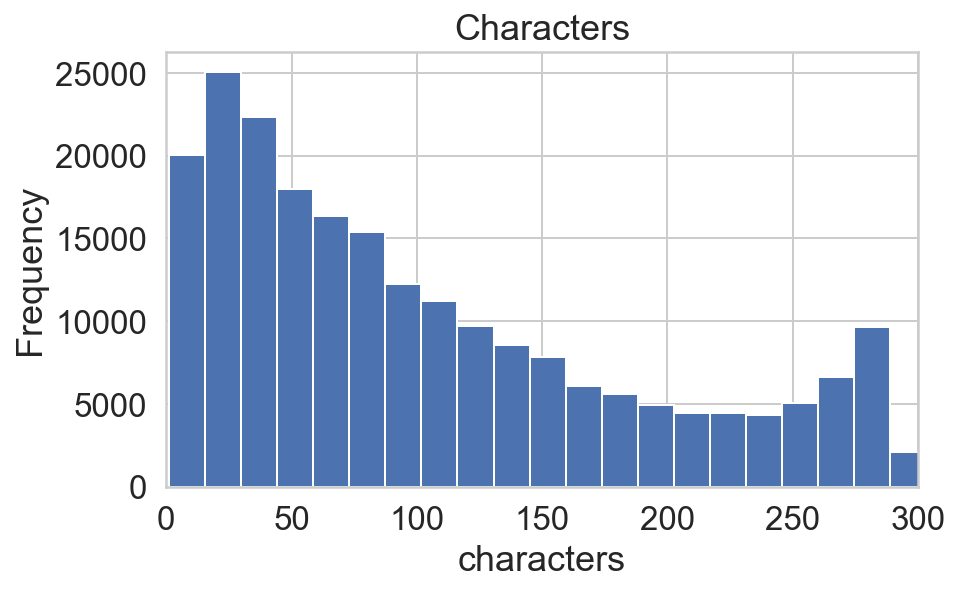

In [78]:
# Plot Histogram on x
x = char_count
plt.hist(x, bins=50)
plt.gca().set(title='Characters', ylabel='Frequency', xlabel='characters');
plt.xlim(0, 300)

(0.0, 100.0)

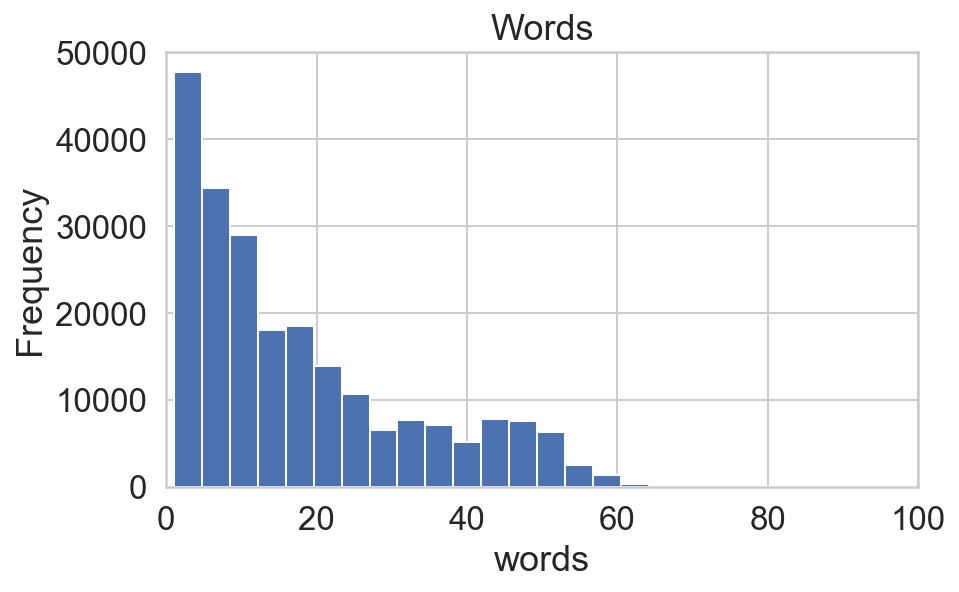

In [79]:
# Plot Histogram on x
x = word_counts
plt.hist(x, bins=50)
plt.gca().set(title='Words', ylabel='Frequency', xlabel='words');
plt.xlim(0, 100)